In [51]:
#Cargamos pandas 
import pandas as pd

#Cargamos el modelo con los datos del entrenamiento
from sklearn import tree

#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix

#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt

#Seaborn is a library for making statistical graphics in Python
import seaborn as sn

#Para procesar la matriz de confusion
from sklearn.metrics import confusion_matrix

#Permite  viualizar de forma gráfica la estimación del árbol de decisión
#un árbol de decisión
from sklearn.tree import plot_tree

#Permite mostrar las métricas
from sklearn.metrics import classification_report
# plot ROC Curve

from sklearn.metrics import roc_curve
# compute ROC AUC

from sklearn.metrics import roc_auc_score
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score


In [52]:


#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dthealth = pd.read_csv("/UCordoba/Machine Learning/Data/heart.csv")
#se muestra el dataframe
dthealth.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
#En X se separan las variables independientes, 

X= dthealth[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que existe anomalias)
y=dthealth['target']
#Se visualizan las variables independientes 
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [54]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dthealth.columns=dthealth.columns.str.strip()

In [55]:
dthealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [56]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dthealth.describe(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [57]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=30)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[-0.03528531,  0.64358464, -0.92137591, ..., -0.61301236,
         1.30310532, -0.50750191],
       [-0.69527405,  0.64358464,  0.04586644, ..., -0.61301236,
        -0.71924645, -0.50750191],
       [ 1.50468841, -1.55379719,  1.0131088 , ..., -0.61301236,
        -0.71924645, -0.50750191],
       ...,
       [-0.14528343,  0.64358464, -0.92137591, ..., -2.23489377,
        -0.71924645,  1.08845805],
       [-0.25528156, -1.55379719,  1.0131088 , ..., -0.61301236,
        -0.71924645, -0.50750191],
       [-1.35526279, -1.55379719, -0.92137591, ..., -0.61301236,
        -0.71924645, -0.50750191]])

In [60]:
y_train

219    0
752    1
858    1
759    0
277    1
      ..
140    0
500    1
813    0
941    1
421    1
Name: target, Length: 717, dtype: int64

In [61]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [62]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [63]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02
mean,1.300680e-16,-6.193713e-17,-2.972982e-17,6.813084e-16,-1.337842e-16,-3.468479e-17,-9.909941e-18,3.319830e-16,1.981988e-17,4.954970e-18,-7.432455e-17,3.220731e-17,-1.783789e-16
std,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00,1.000698e+00
min,-2.785238e+00,-1.553797e+00,-9.213759e-01,-2.136155e+00,-2.399052e+00,-4.142084e-01,-9.953429e-01,-3.397790e+00,-7.004602e-01,-9.245660e-01,-2.234894e+00,-7.192464e-01,-3.699422e+00
25%,-8.052722e-01,-1.553797e+00,-9.213759e-01,-6.581934e-01,-6.843382e-01,-4.142084e-01,-9.953429e-01,-7.141614e-01,-7.004602e-01,-9.245660e-01,-6.130124e-01,-7.192464e-01,-5.075019e-01
50%,7.471281e-02,6.435846e-01,4.586644e-02,-8.974643e-02,-1.194912e-01,-4.142084e-01,9.128412e-01,1.082410e-01,-7.004602e-01,-2.396492e-01,-6.130124e-01,-7.192464e-01,-5.075019e-01
75%,7.347016e-01,6.435846e-01,1.013109e+00,4.787005e-01,5.865676e-01,-4.142084e-01,9.128412e-01,7.142217e-01,1.427633e+00,6.164967e-01,1.008869e+00,2.919294e-01,1.088458e+00
max,2.494672e+00,6.435846e-01,1.980351e+00,3.889382e+00,6.436769e+00,2.414243e+00,2.821025e+00,2.272458e+00,1.427633e+00,4.383539e+00,1.008869e+00,3.325457e+00,1.088458e+00


In [64]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [65]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [66]:

model =tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [68]:
#Se prueba el modelo con variables que permitan determinar la presencia de la enfermedad cardiaca 
model.predict([[63,1,3,145,223,1,0,150,0,2.3,0,0,1]])

array([0], dtype=int64)

In [70]:
#Se prueba el modelo con variables que permitan determinar la ausencia de la enfermedad cardiaca 
model.predict([[56,1,2,130,256,1,0,142,1,0.6,1,1,1]])

array([0], dtype=int64)

In [71]:
cm= confusion_matrix(y_test,y_predicted)
cm

array([[147,  11],
       [  3, 147]], dtype=int64)

Text(95.72222222222221, 0.5, 'True')

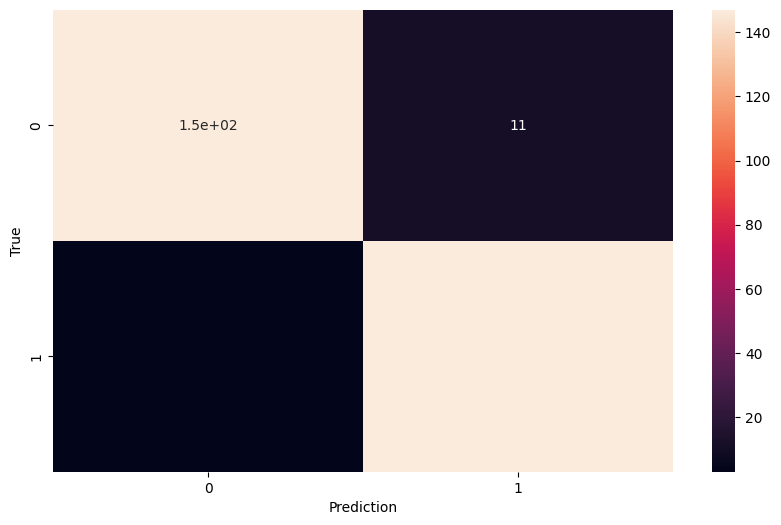

In [72]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')

In [73]:
cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[147  11]
 [  3 147]]

True Positives(TP) =  147

True Negatives(TN) =  147

False Positives(FP) =  11

False Negatives(FN) =  3


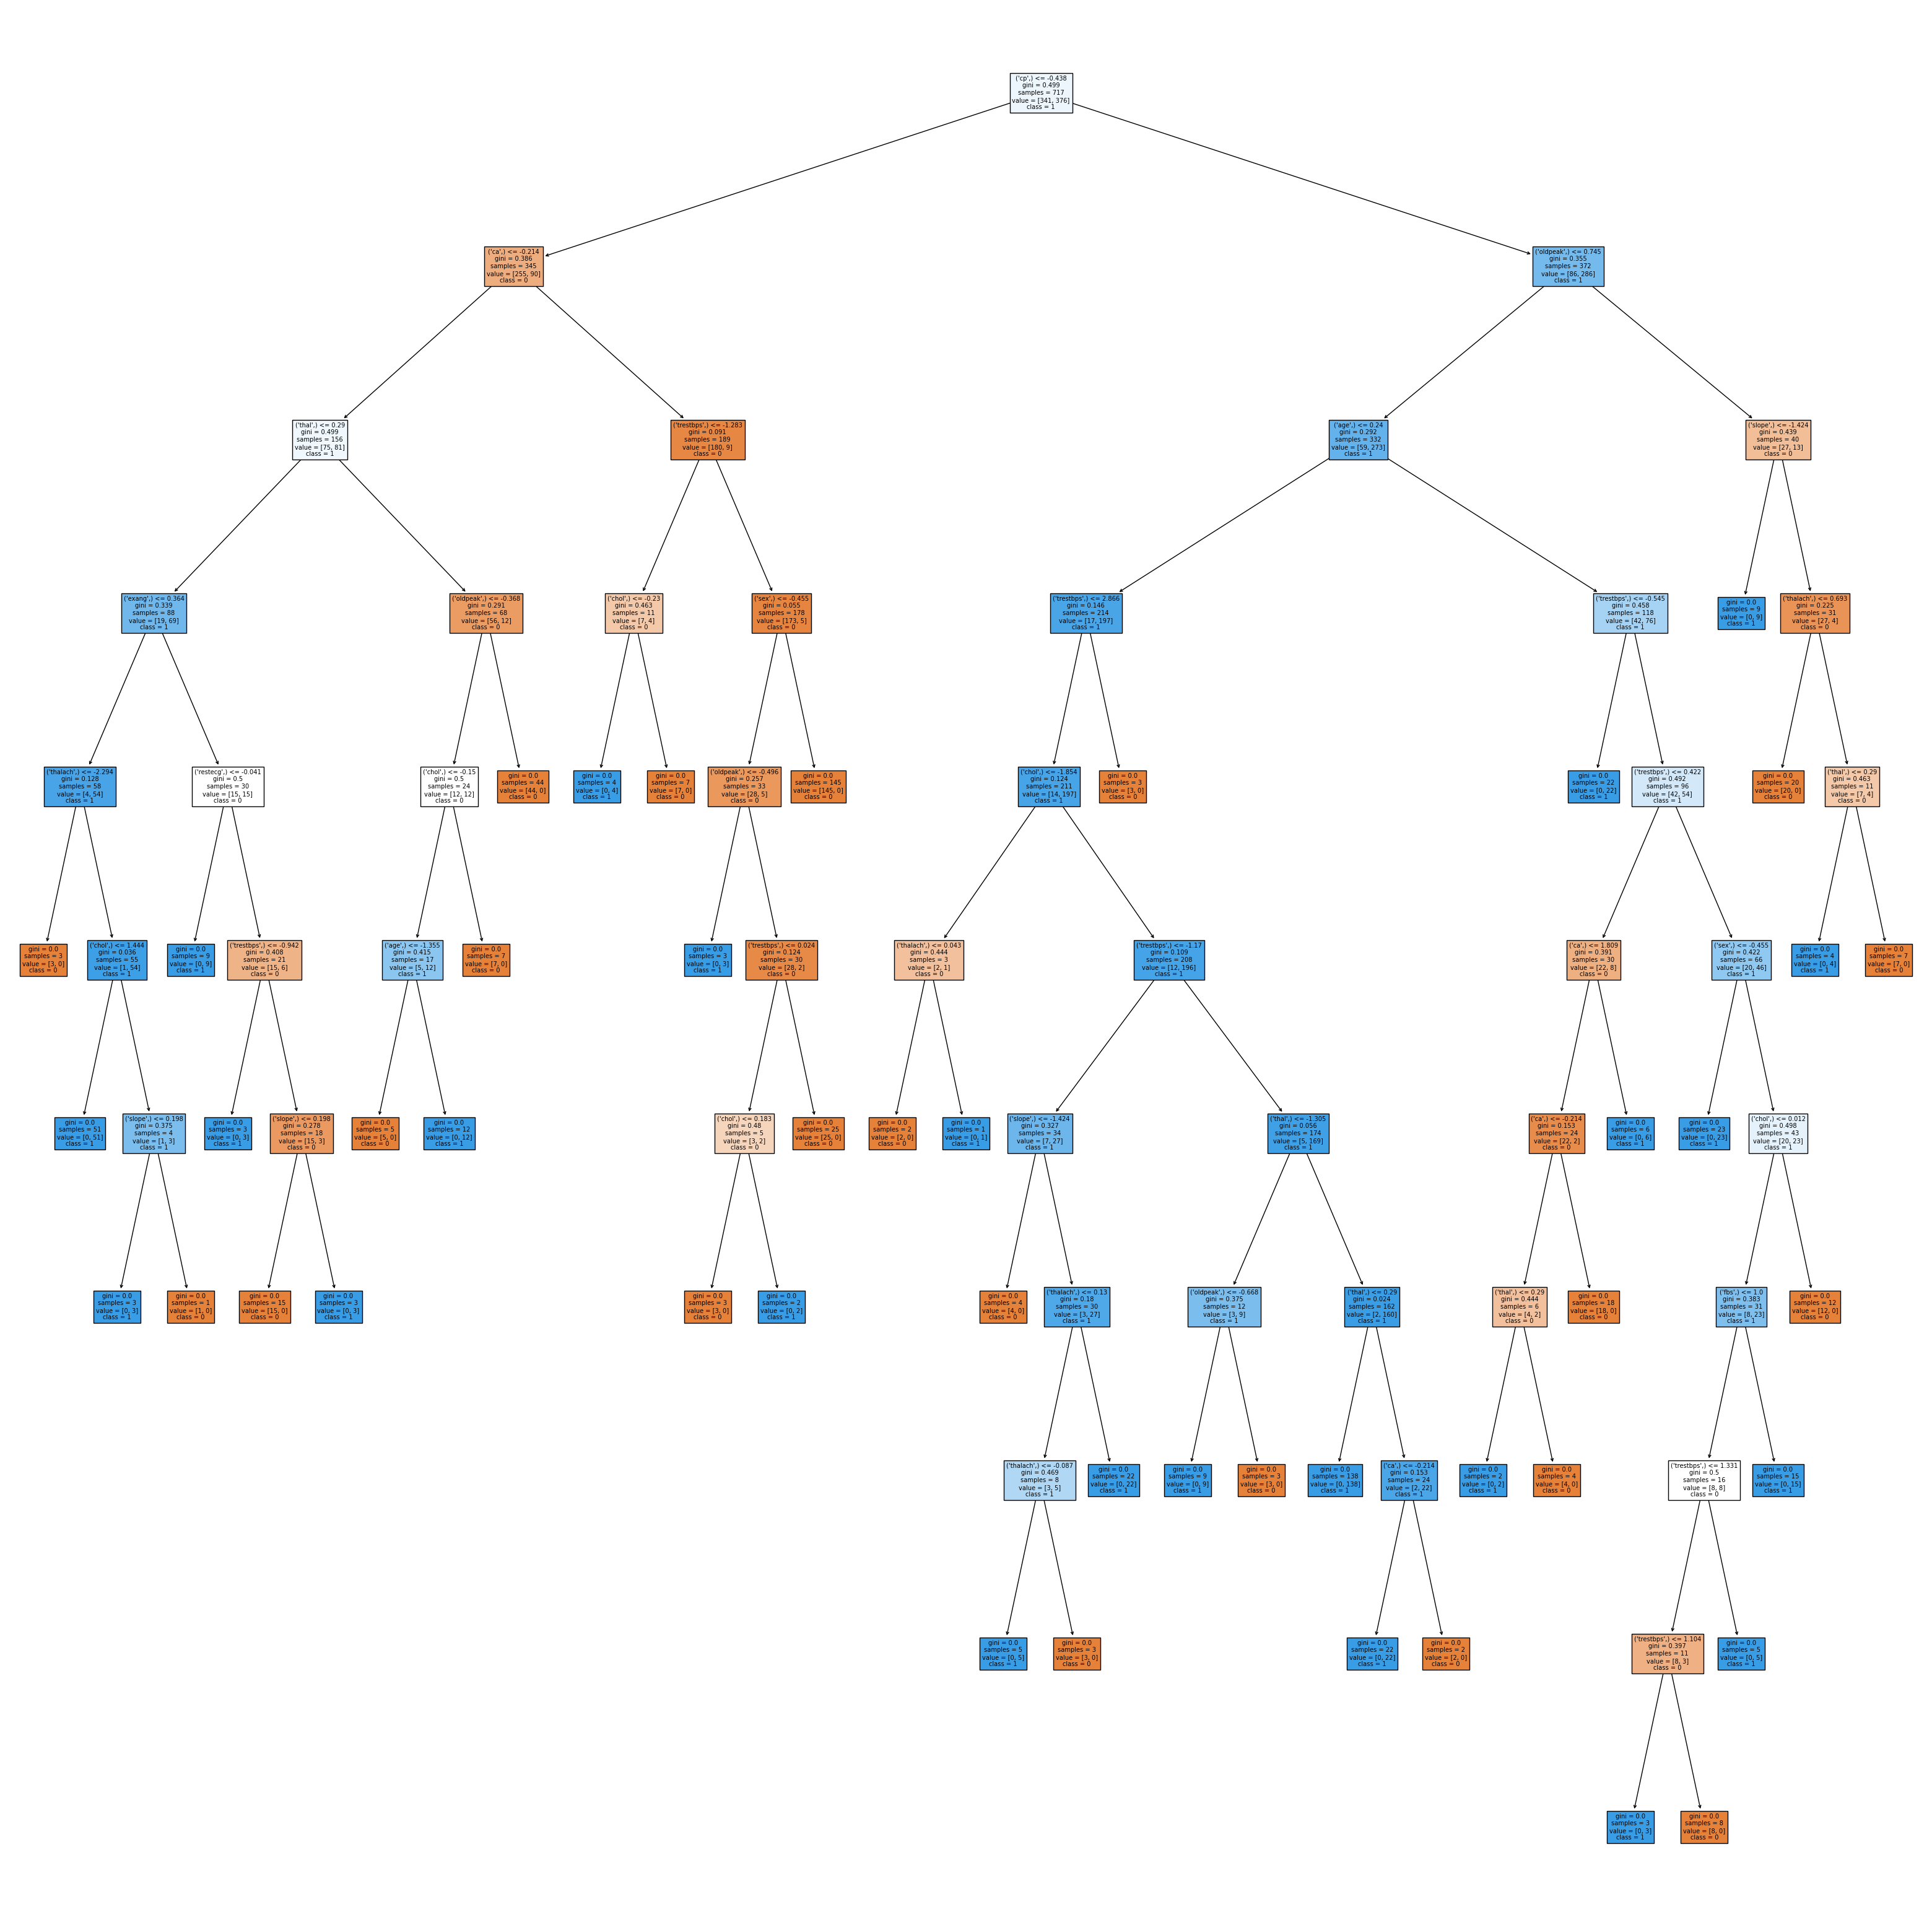

In [77]:
plt.figure(figsize=(40,40))
plot_tree(model, feature_names = X_train.columns,class_names=["0", "1"],filled=True);

array([[<Axes: title={'center': "('age',)"}>,
        <Axes: title={'center': "('sex',)"}>,
        <Axes: title={'center': "('cp',)"}>,
        <Axes: title={'center': "('trestbps',)"}>],
       [<Axes: title={'center': "('chol',)"}>,
        <Axes: title={'center': "('fbs',)"}>,
        <Axes: title={'center': "('restecg',)"}>,
        <Axes: title={'center': "('thalach',)"}>],
       [<Axes: title={'center': "('exang',)"}>,
        <Axes: title={'center': "('oldpeak',)"}>,
        <Axes: title={'center': "('slope',)"}>,
        <Axes: title={'center': "('ca',)"}>],
       [<Axes: title={'center': "('thal',)"}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

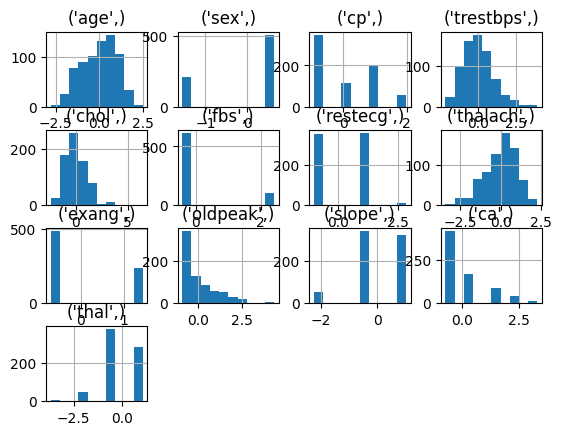

In [78]:
%matplotlib inline
X_train.hist()

In [79]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       158
           1       0.93      0.98      0.95       150

    accuracy                           0.95       308
   macro avg       0.96      0.96      0.95       308
weighted avg       0.96      0.95      0.95       308



In [81]:
#Definicion de los diferentes tipos de errores de clasificacion
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [82]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0455


In [83]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9304


In [84]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9800


In [85]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9800


In [86]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0696


In [87]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9304


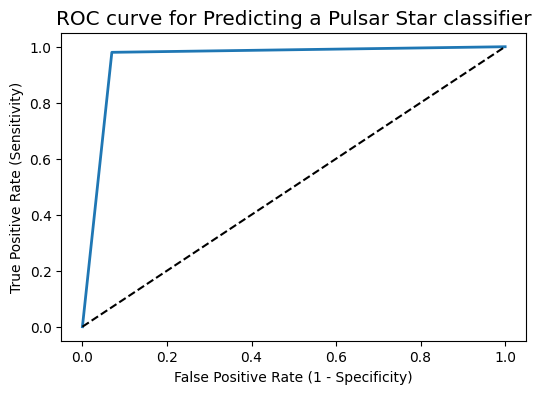

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [89]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9552


In [90]:
Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9777


In [91]:
dthealth.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

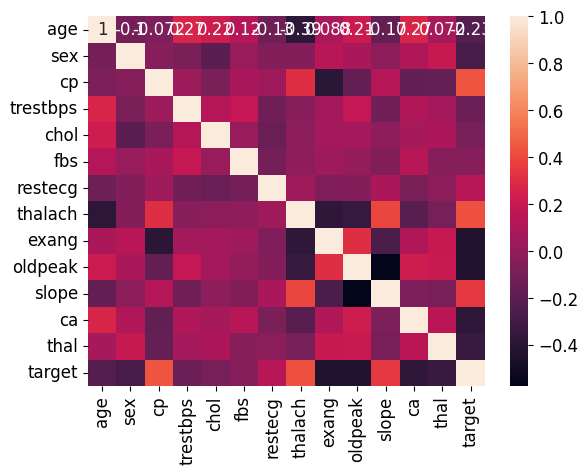

In [93]:
#Imprimir la matriz de correlacion
correlation_matrix= dthealth.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()

In [95]:
import numpy as np
covMatrix=dthealth.cov()
print (covMatrix)

                 age       sex        cp    trestbps         chol       fbs  \
age        82.306450 -0.431198 -0.672251   43.085733   102.890625  0.392164   
sex        -0.431198  0.211944 -0.019491   -0.636863    -4.708984  0.004465   
cp         -0.672251 -0.019491  1.060160    0.688565    -4.336914  0.029108   
trestbps   43.085733 -0.636863  0.688565  306.835410   115.657227  1.135165   
chol      102.890625 -4.708984 -4.336914  115.657227  2661.787109  0.495117   
fbs         0.392164  0.004465  0.029108    1.135165     0.495117  0.127111   
restecg    -0.635490 -0.013395  0.023687   -1.144685    -4.014648 -0.019583   
thalach   -81.446089 -0.522838  7.268296  -15.822822   -25.841797 -0.072719   
exang       0.378144  0.030288 -0.195451    0.506798     1.643555  0.008303   
oldpeak     2.218825  0.045812 -0.211407    3.857971     3.933301  0.004549   
slope      -0.947742 -0.007584  0.083727   -1.303344    -0.454102 -0.013634   
ca          2.539458  0.053021 -0.187017    1.887842

<Axes: >

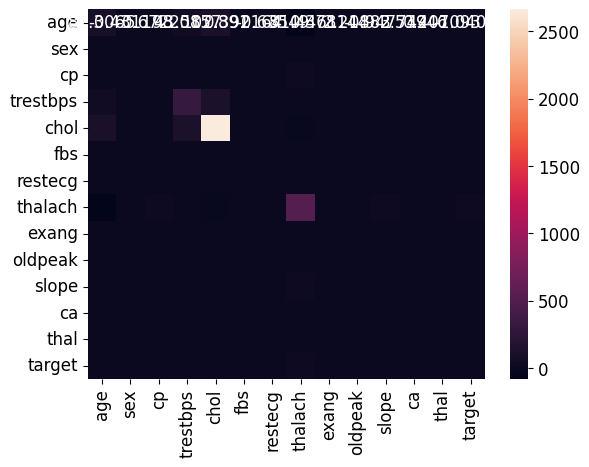

In [96]:
sn.heatmap(covMatrix, annot=True, fmt='g')